In [2]:
import numpy as np
import sklearn.model_selection
import pandas as pd
import matplotlib.pyplot as plt

Part A

Loads the wine quality csv and properly prepares the data by splitting the numbers.

In [15]:
# read wine quality for red wines
redwine = pd.read_csv('winequality-red.csv', header = None)
redwine = redwine[1:].to_numpy()

fix_redwine = np.array([])
quality = np.array([])
for i in range(redwine.shape[0]):
    temp = redwine[i][0].split(";")
    fix_redwine = np.append(fix_redwine, temp[:-1])
    quality = np.append(quality, temp[-1])

fix_redwine = fix_redwine.reshape(redwine.shape[0], 11)
fix_redwine = fix_redwine.astype(np.float64)
quality = quality.astype(np.float64)


print(fix_redwine.shape, quality.shape)





(1599, 11) (1599,)


Part B

Splitting the data into train, validation, and test sets. Also normalize the train and test sets


Part C

Also uses closed form solution to find the optimal solutions.

In [16]:
x_train, x_validation, y_train, y_validation = sklearn.model_selection.train_test_split(fix_redwine, quality, test_size=0.2)
x_validation, x_test, y_validation, y_test = sklearn.model_selection.train_test_split(x_validation, y_validation, test_size=0.5)

print(x_train.shape)
print(x_validation.shape)

x_train = (x_train-np.mean(x_train))/np.std(x_train)
print(x_train)
x_test = (x_test-np.mean(x_test))/np.std(x_test)

w = np.linalg.inv(x_train.T @ x_train) @ x_train.T @ y_train

print(w)

(1279, 11)
(160, 11)
[[-0.04482749 -0.44450988 -0.47717337 ... -0.28297405 -0.45223034
   0.07988766]
 [-0.05076631 -0.43025672 -0.47836113 ... -0.28534958 -0.45104258
   0.06207121]
 [ 0.10364293 -0.45460587 -0.45460587 ... -0.29663333 -0.43975882
   0.03831595]
 ...
 [-0.1873591  -0.46173245 -0.48370607 ... -0.26456372 -0.43975882
   0.34713443]
 [-0.08639921 -0.46767126 -0.46767126 ... -0.29069452 -0.46113856
   0.21054164]
 [ 0.18678637 -0.46232633 -0.4599508  ... -0.30079051 -0.43678942
   0.06801003]]
[ -0.04201228 -18.79536252  -3.04993187   0.10686092 -24.87047851
   0.07648609  -0.055859    30.3385443   -8.03449023  13.83790325
   4.79183579]


Part D.

Graph of predicted values and actual values. Graphed with the line x=y to visualize the error



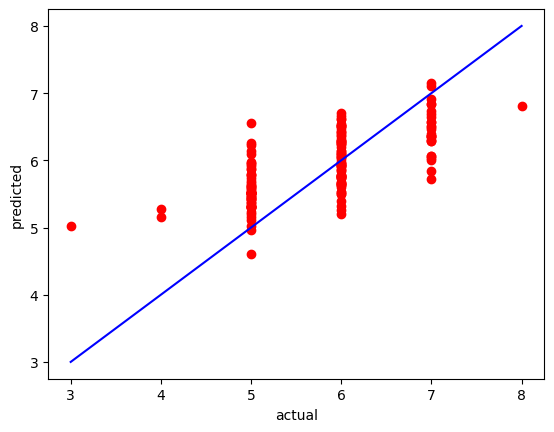

In [17]:
y_pred = x_test @ w

x2 = np.linspace(3, 8, 100)
plt.plot(y_test, y_pred, 'ro')
plt.plot(x2, x2, color = "blue")
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

The x axis is the actual classification of wine quality. The y axis is the predicted wine quality from the model. It shows that the predicted values are more centered at 5, but the actual vvalues are more varied

Part E.

Calculate the root mean square of the training set and testing set

In [18]:
y_train_pred = x_train @ w
rms_train = np.sqrt(np.sum(y_train_pred-y_train)**2/x_train.shape[0])
print("Train rms: ", rms_train)

y_test_pred = x_test @ w
rms_test = np.sqrt(np.sum(y_test_pred-y_test)**2/x_test.shape[0])
print("Test rms: ", rms_test)

Train rms:  2.3761801841469678e-06
Test rms:  1.6904900488831094


Part F

Implementation of LMS to find optimal weights using iterative approach, with random weight initializers

In [20]:
w = np.random.randn(11)

lr = 0.01
epochs = 100



for i in range(epochs):
  for i in range(10):#x_train.shape[0]):
    print(w)
    w += lr * (y_train[i]-w.T @ x_train[i]) * x_train[i]



[ 2.26562027 -0.78660009  0.83067199 -0.22123133  0.2979065  -0.67145957
 -0.5964271   0.78089611  0.0890324  -0.72049981  0.22177198]
[ 2.26313415 -0.81125249  0.80420808 -0.24282063  0.27165997 -0.68185046
 -0.55411955  0.75731744  0.07333873 -0.74558039  0.22620253]
[ 2.25946071 -0.84238573  0.76959402 -0.27012927  0.23693418 -0.63094807
 -0.34851404  0.72655687  0.05269093 -0.77821768  0.23069398]
[ 2.26767938e+00 -8.78435011e-01  7.33544734e-01 -2.43544110e-01
  1.99495634e-01 -4.43302919e-01 -7.50774357e-04  6.92873655e-01
  2.91685298e-02 -8.13089628e-01  2.33732353e-01]
[ 2.26474836 -0.90437326  0.70647498 -0.246818    0.17177441 -0.35125621
  0.38617261  0.6683347   0.01276234 -0.83937076  0.23800182]
[ 2.26457555 -0.92836223  0.6813354  -0.26653551  0.14631959 -0.33598242
  0.47079852  0.64577123 -0.00254185 -0.86321787  0.24066613]
[ 2.26937209 -0.95065086  0.6581138  -0.28098139  0.1227802  -0.33643381
  0.53448857  0.62490654 -0.01690027 -0.88530241  0.24750354]
[ 2.270369

Part G.

Root mean equare error on train and test sets for iterative solution

In [21]:
y_train_pred = x_train @ w
rms_train = np.sqrt(np.sum(y_train_pred-y_train)**2/x_train.shape[0])
print("Train rms: ", rms_train)

y_test_pred = x_test @ w
rms_test = np.sqrt(np.sum(y_test_pred-y_test)**2/x_test.shape[0])
print("Test rms: ", rms_test)

Train rms:  0.3160479511462463
Test rms:  0.6587156935782889
